In [1]:
import numpy as np

import astropy
import astropy.units as ur
import astropy.constants as cr

%matplotlib inline

from pylab import *

In [2]:
flu = ur.erg/ur.s/ur.cm**2/ur.Angstrom
fnu = ur.erg/ur.s/ur.cm**2/ur.Hertz
q = -22*ur.ABmag

In [3]:
skymag = np.array([22, 20, 19]) * ur.ABmag
skymag

<Magnitude [22., 20., 19.] mag(AB)>

In [4]:
Dtel = 5 * ur.meter
Atel = np.pi*(Dtel/2)**2 * .8
pixel_size = 0. # arcsec
pixel_area = pixel_size**2 # Arcsec2
efficiency = 0.4

Grasp = Atel * pixel_area * efficiency

In [9]:
exptime = 10*ur.min
lam = 5000 * ur.AA
epp = cr.c*cr.h/lam

spectral_density = skymag.to(flu, equivalencies=ur.spectral_density(lam))

Rs = np.arange(100, 6000)
pix_per_res = 3.
BW_per_pix = lam/Rs/pix_per_res


In [10]:
spectral_density

<Quantity [6.90050213e-18, 4.35392250e-17, 1.09365589e-16] erg / (Angstrom cm2 s)>

In [14]:
sky_energys = (spectral_density  * exptime * Atel)
sky_energys.cgs

<Quantity [0.0650357 , 0.41034753, 1.03074639] dyn>

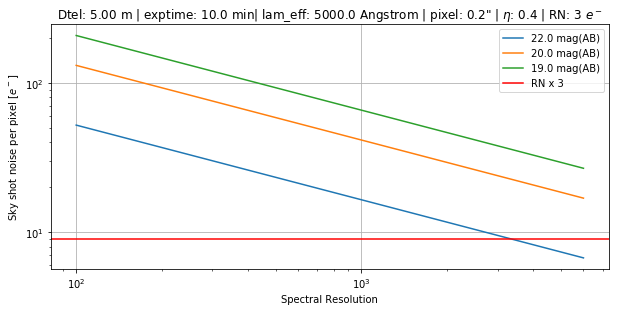

In [18]:
spectral_energy = (spectral_density  * exptime * Atel)

figure(figsize=(10,4.5))
for e_l in spectral_energy:
    num_photons = (e_l*BW_per_pix/epp).cgs
    shotnoise = np.sqrt(num_photons)
    loglog(Rs, shotnoise)

RN = 3
GOAL = 3
axhline(RN * GOAL, color='red')

xlabel("Spectral Resolution")
ylabel("Sky shot noise per pixel [$e^-$]")
title("Dtel: {0:1.2f} | exptime: {1}| lam_eff: {2} | pixel: {3}\" | $\eta$: {4} | RN: {5} $e^-$".format(Dtel, exptime, lam, pixel_size, efficiency, RN))

legs = ["%s" % m for m in skymag]
legs.append("RN x %s" % GOAL)
legend(legs)
grid(True)

In [16]:
noise

NameError: name 'noise' is not defined

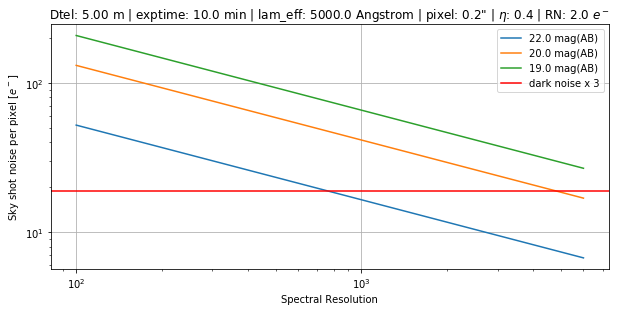

In [17]:
spectral_energy = (spectral_density  * exptime * Atel)

figure(figsize=(10,4.5))
for e_l in spectral_energy:
    num_photons = (e_l*BW_per_pix/epp).cgs
    shotnoise = np.sqrt(num_photons)
    loglog(Rs, shotnoise)

GOAL = 3
    







# Andor IKON
DC = 0.0004/ur.s ; RN = 3.2

# Andor SCMOS
DC0 = 0.2
DC = 0.06/ur.s ; RN = 2.

noise = np.sqrt(DC * exptime + RN**2)
axhline(noise * GOAL, color='red')

xlabel("Spectral Resolution")
ylabel("Sky shot noise per pixel [$e^-$]")
title("Dtel: {0:1.2f} | exptime: {1} | lam_eff: {2} | pixel: {3}\" | $\eta$: {4} | RN: {5} $e^-$".format(Dtel, exptime, lam, pixel_size, efficiency, RN))

legs = ["%s" % m for m in skymag]
legs.append("dark noise x %s" % GOAL)
legend(legs)
grid(True)

bb

# Guider sky background

In [36]:
Dtel = 0.16 * ur.meter
Atel = np.pi*(Dtel/2)**2 * .8
pixel_size = 1 # arcsec
pixel_area = pixel_size**2 # Arcsec2
efficiency = 0.5

Grasp = Atel * pixel_area * efficiency

exptime = 7*ur.second
lam = 5000 * ur.AA
epp = cr.c*cr.h/lam

skymag = np.array([22]) * ur.ABmag
skymag

flu = ur.erg/ur.s/ur.cm**2/ur.Angstrom
spectral_density = skymag.to(flu, equivalencies=ur.spectral_density(lam))


BW = 100 * ur.nm

(spectral_density * BW * Grasp / epp * exptime).cgs

<Quantity [0.97782661]>